In [1]:
from util.stream import Stream, transform_stream
from util.drift_generator import DriftGenerator
import os
import yaml

### Creating Stream objects from source datasets

In [2]:
# Parse source filepaths from config (.yaml) file
with open('ECG_drift_demo_config.yaml') as f:
    config_param = yaml.load(f, Loader=yaml.FullLoader)
source_dir = os.path.abspath(config_param['source_dir'])
walk_ECG_filepath = f"{source_dir}/{config_param['source_files'][0]}"
run_ECG_filepath = f"{source_dir}/{config_param['source_files'][1]}"

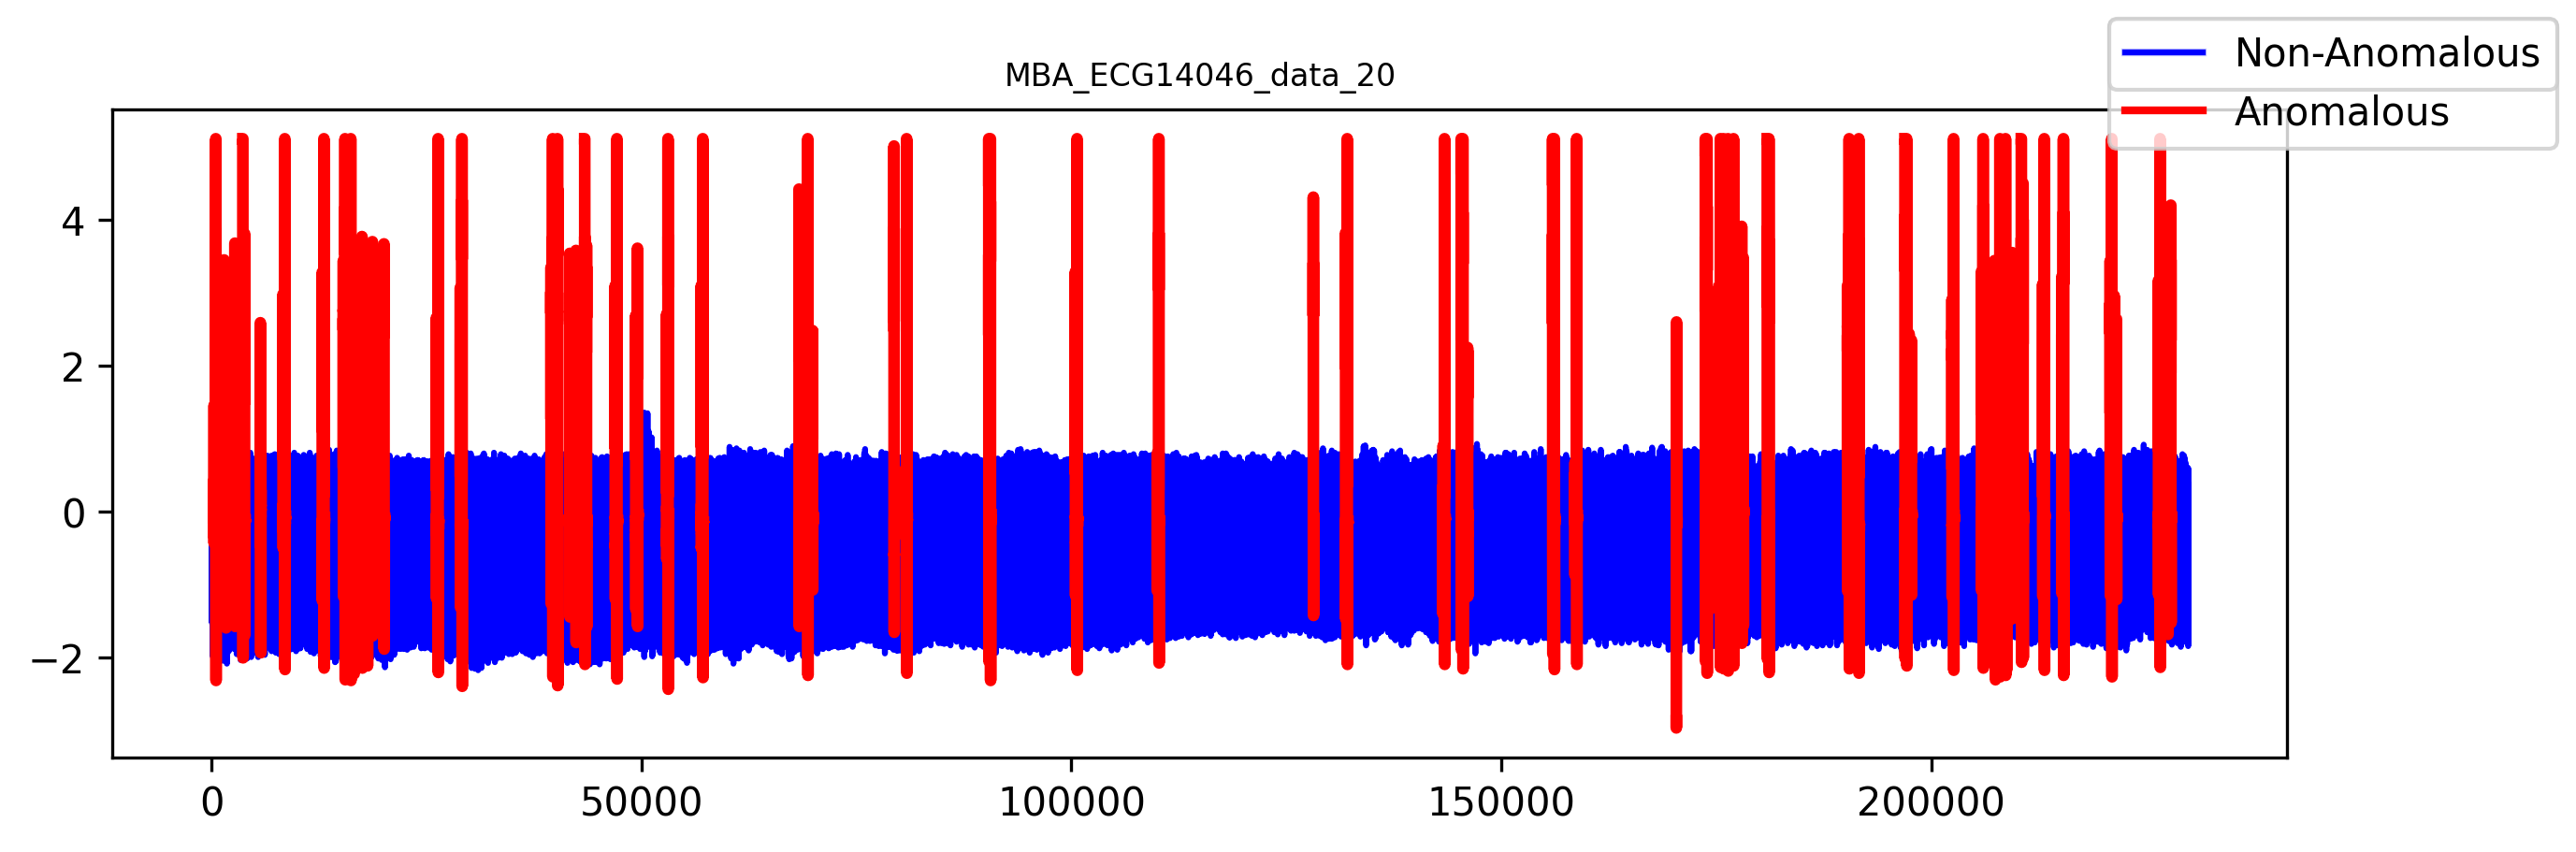

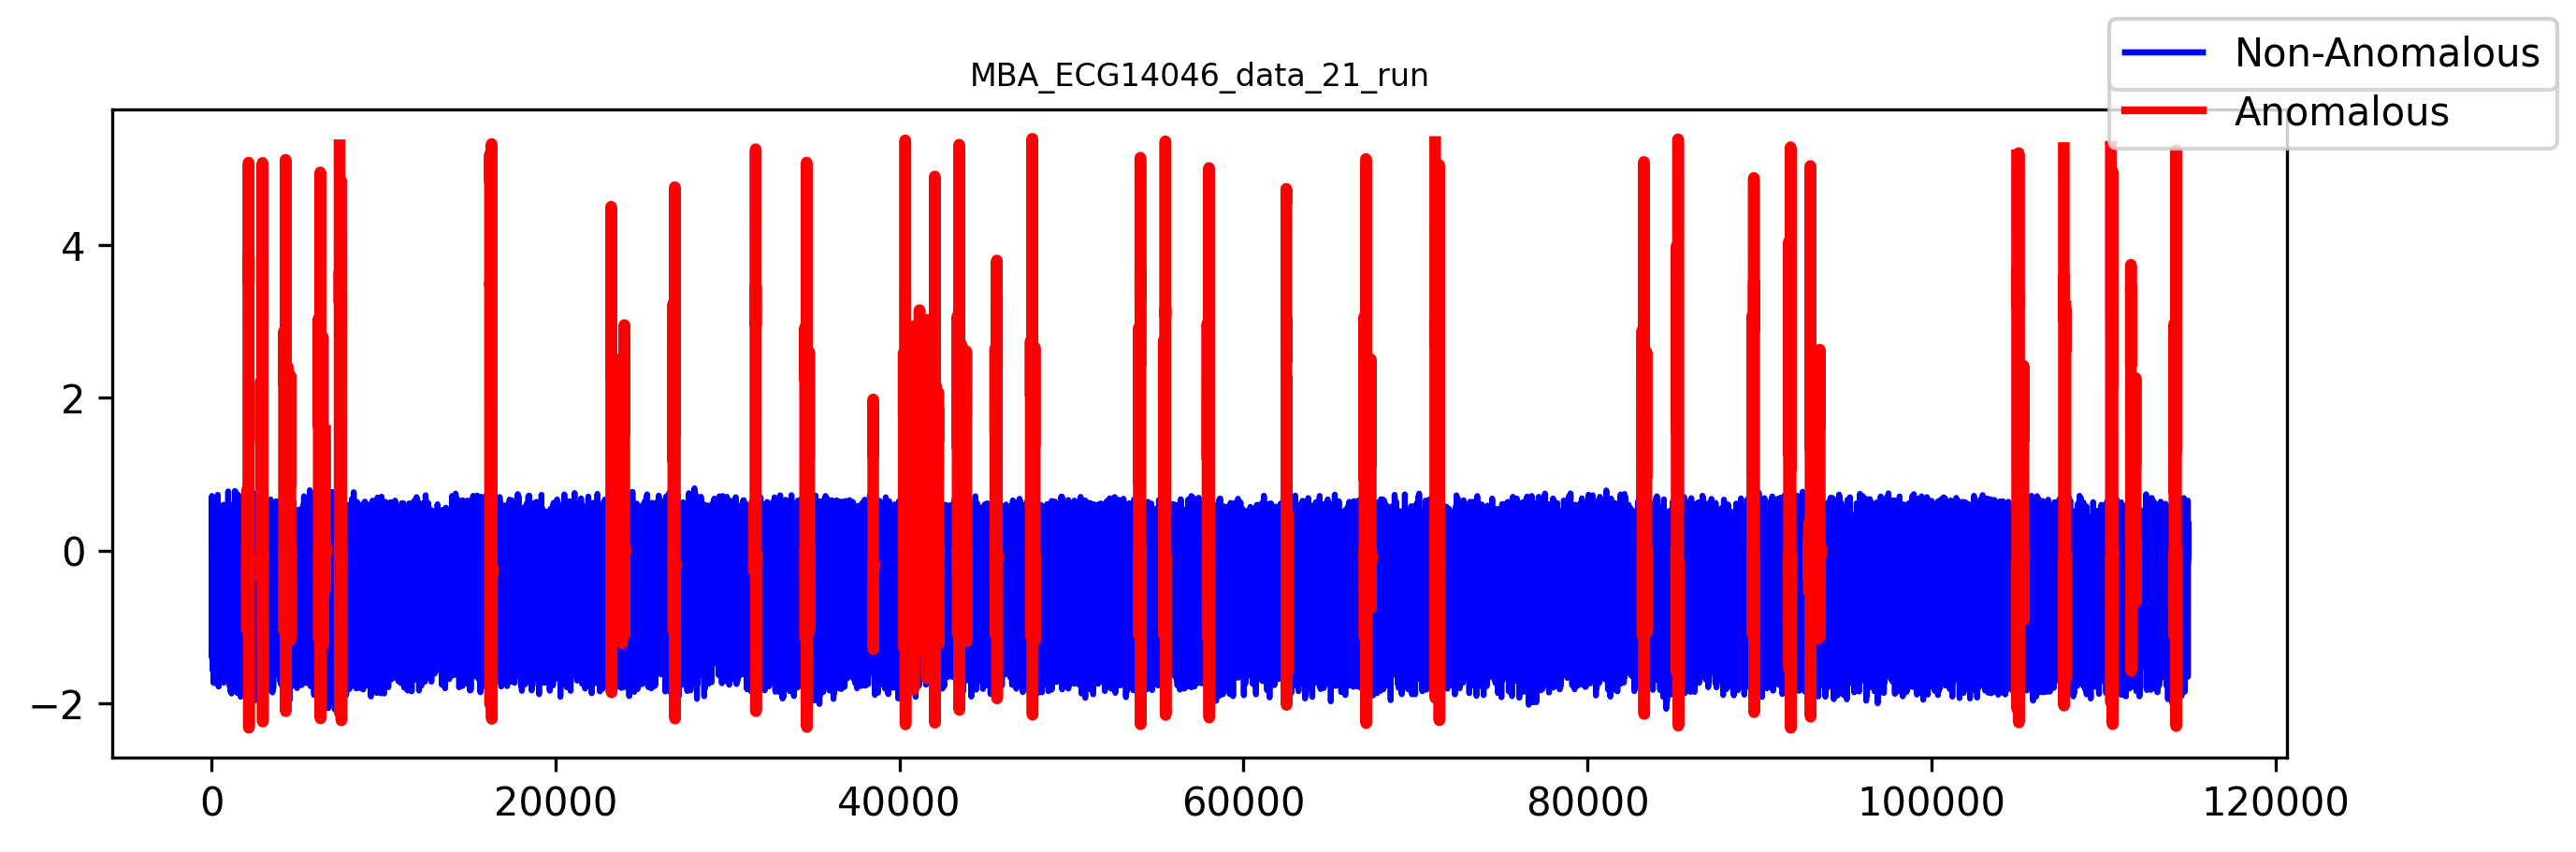

In [3]:
# Create stream objects from files defined in config
# Transform one stream to imitate increased heart rate (ie. when running)
walk_ECG = Stream(walk_ECG_filepath)
run_ECG_src = Stream(run_ECG_filepath)
run_ECG = transform_stream(run_ECG_src, 0, run_ECG_src.data.size-1, 0.5)
run_ECG.filename = f"{run_ECG.filename}_run"
# Plot the streams
walk_ECG.plot()
run_ECG.plot()

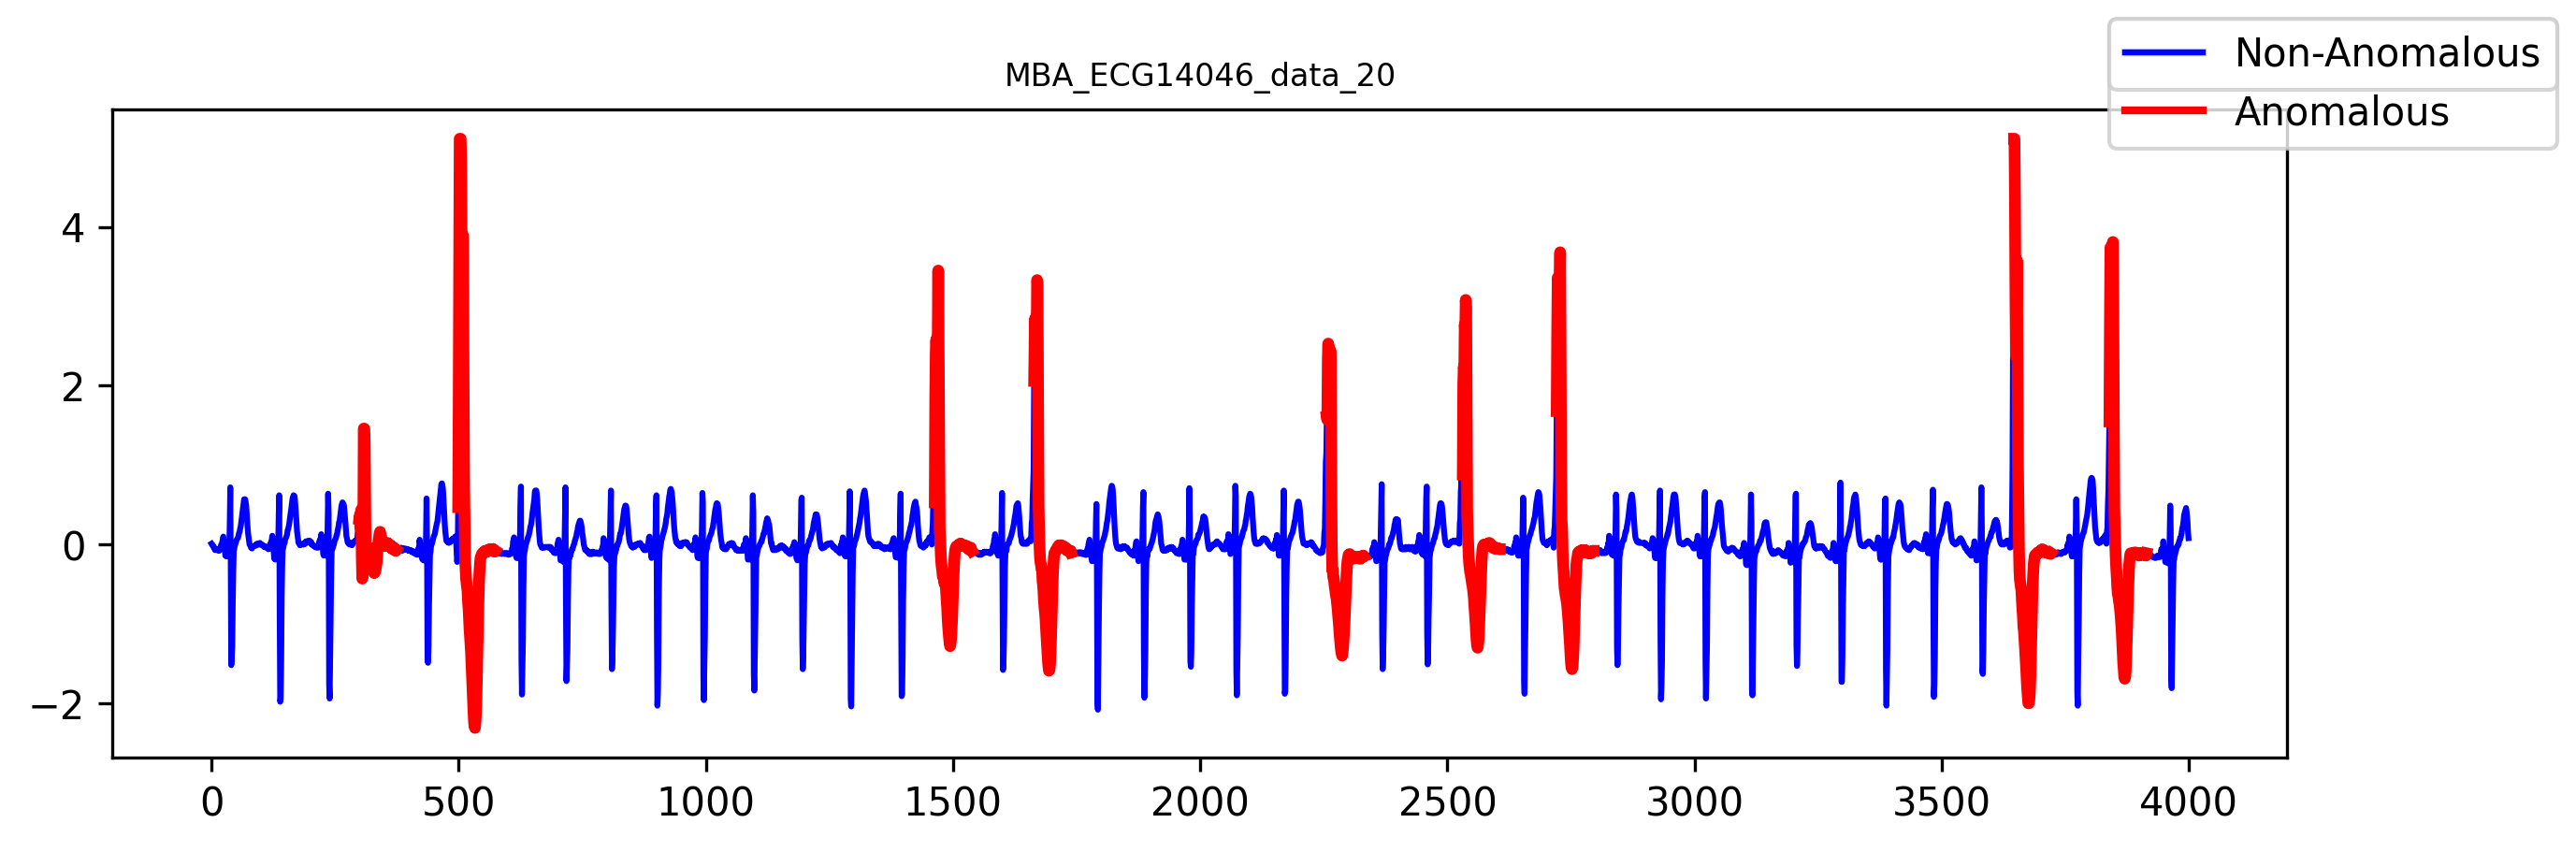

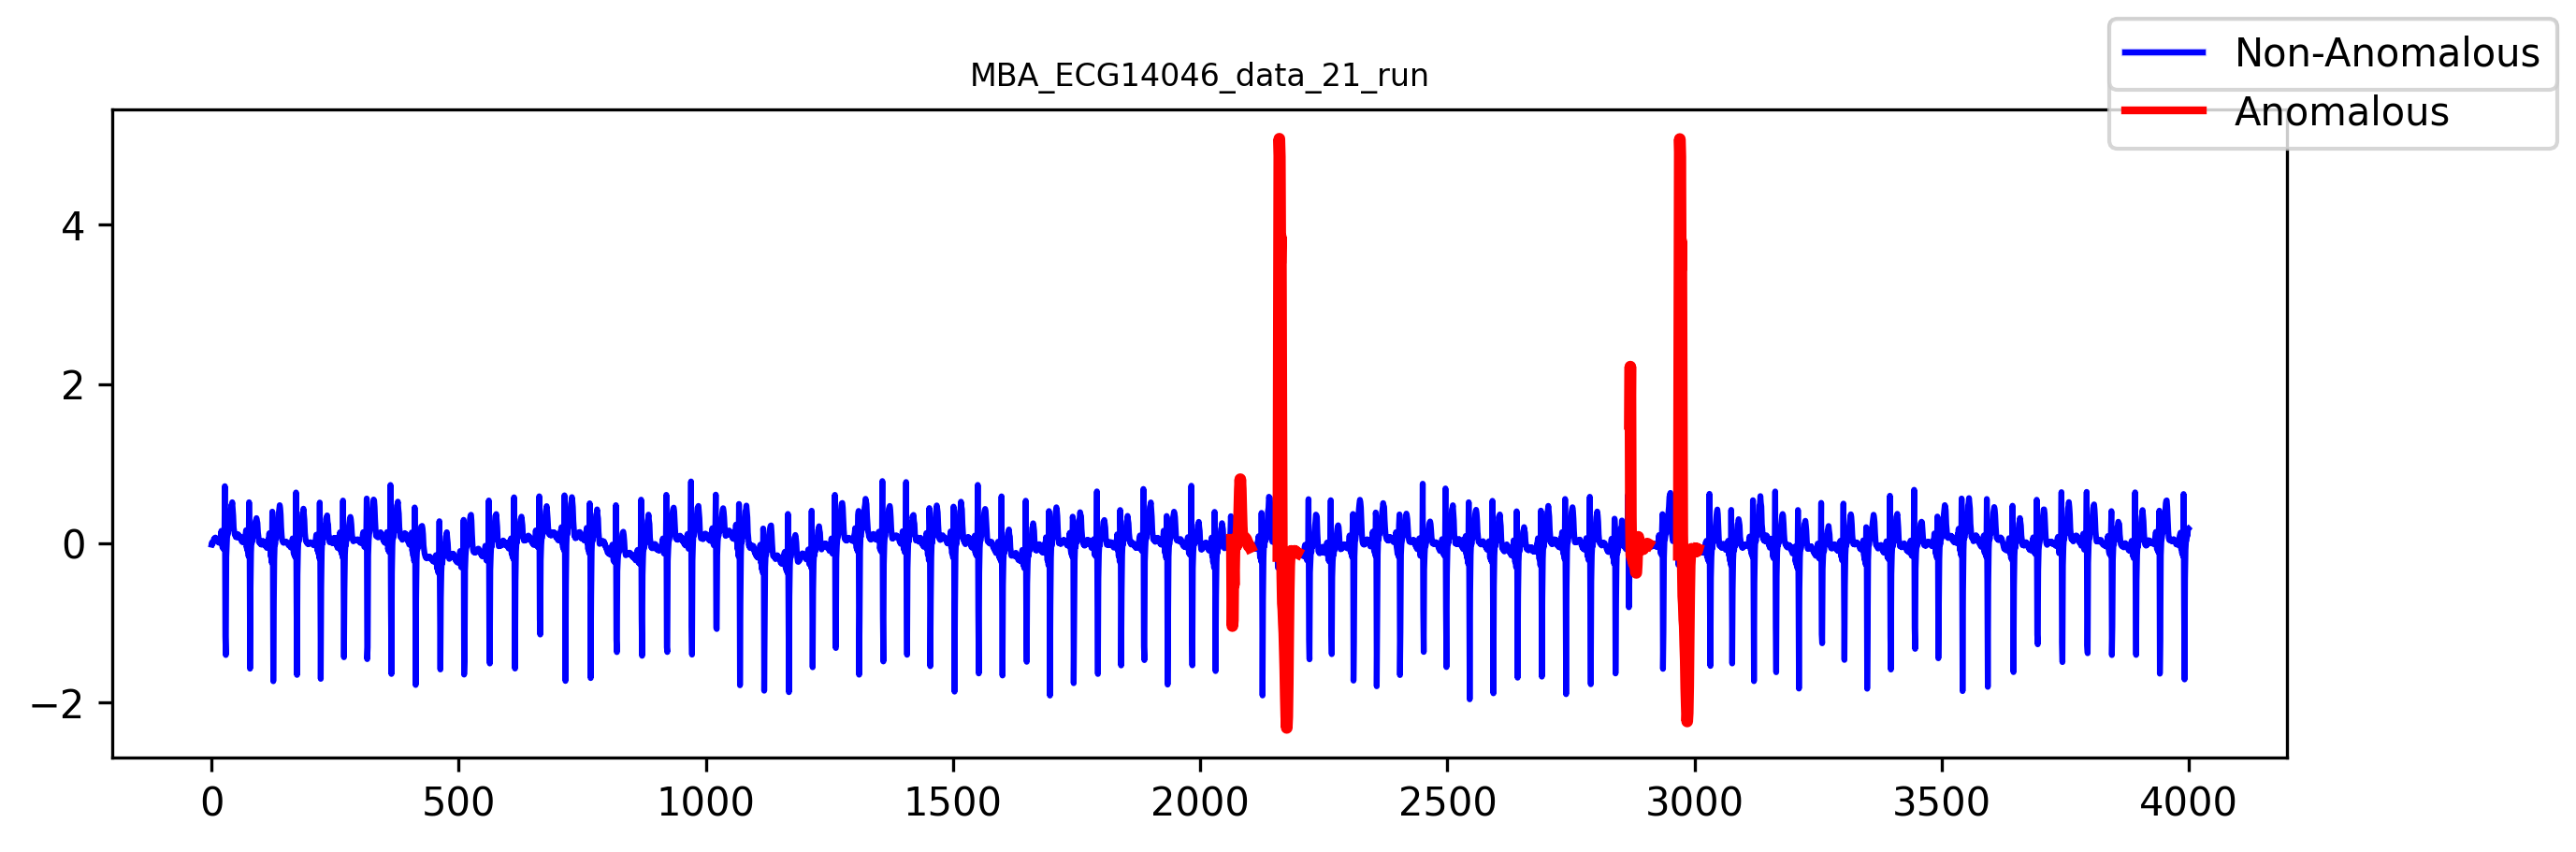

In [4]:
# Plot the first 4000 data points from both streams
walk_ECG.plot(end=4000)
run_ECG.plot(end=4000)

In [5]:
# Create an ARFF file for the transformed stream
run_ECG.to_arff(source_dir)

'/Users/tammyz/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_21_run.arff'

### Generate drift from streams created

In [6]:
# Parse parameters from config file (.yaml)
drift_dir = os.path.abspath(config_param['drift_dir'])
moa_path = os.path.abspath(config_param['moa_path'])
drift_params = config_param['drift_params']
length = drift_params['length']
n_drift = drift_params['n_drift']
p_drift = drift_params['p_drift']
p_before = drift_params['p_before']
sub_dir = drift_params['sub_dir']

In [7]:
# Define streams created above as source streams for drift
source_streams = [walk_ECG, run_ECG]
g = DriftGenerator(source_dir, drift_dir, moa_path, selected_streams=source_streams)

In [8]:
# Generate DriftStream object using defined parameters
ds = g.run_generate_grad_stream_moa(
    length=length, 
    p_drift=p_drift, 
    n_drift=n_drift,
    p_before=p_before, 
    sub_dir=sub_dir,
    dataset='ECG',
    mode=0 # 0 for variable drift widths and positions, 1 for uniform
)

Generating splits...
	Getting partitions...
	Getting order of drifts coming before anomaly...
	Getting drift center positions...
	Getting stream file cuts...
Done!
Getting stream file cuts...	Done!
Creating intermediate files...	Done!
Recursively generating MOA command...	Done!
Drift filename:  ECG_grad_p34_n15_b50
Running terminal command...	


{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 0.66s (CPU time)



Stream written to ARFF file /Users/tammyz/Desktop/AnomalyDriftDetection/data/synthetic/demo/ECG_grad_p34_n15_b50.arff
Done!
Generating drift labels...	Done!


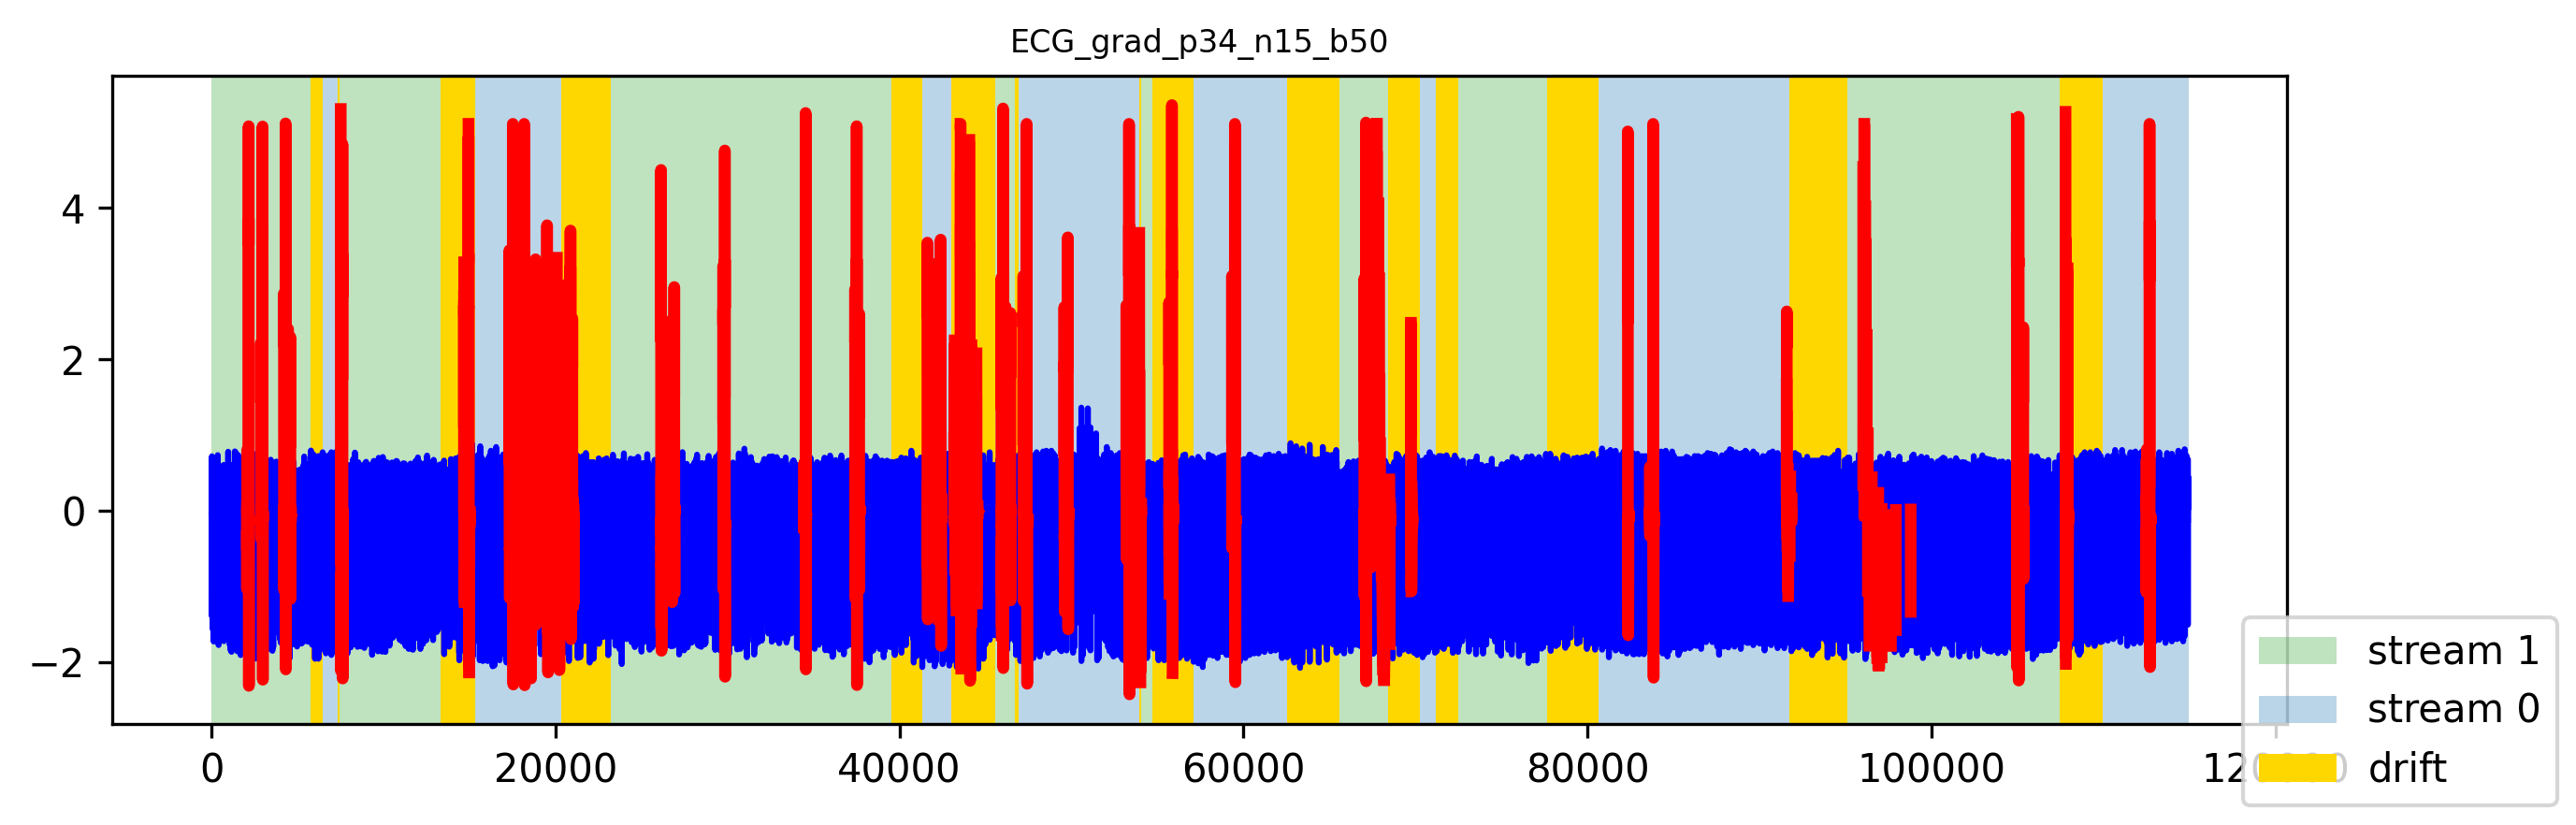

In [9]:
# Plot full drift stream
ds.plot_drift()

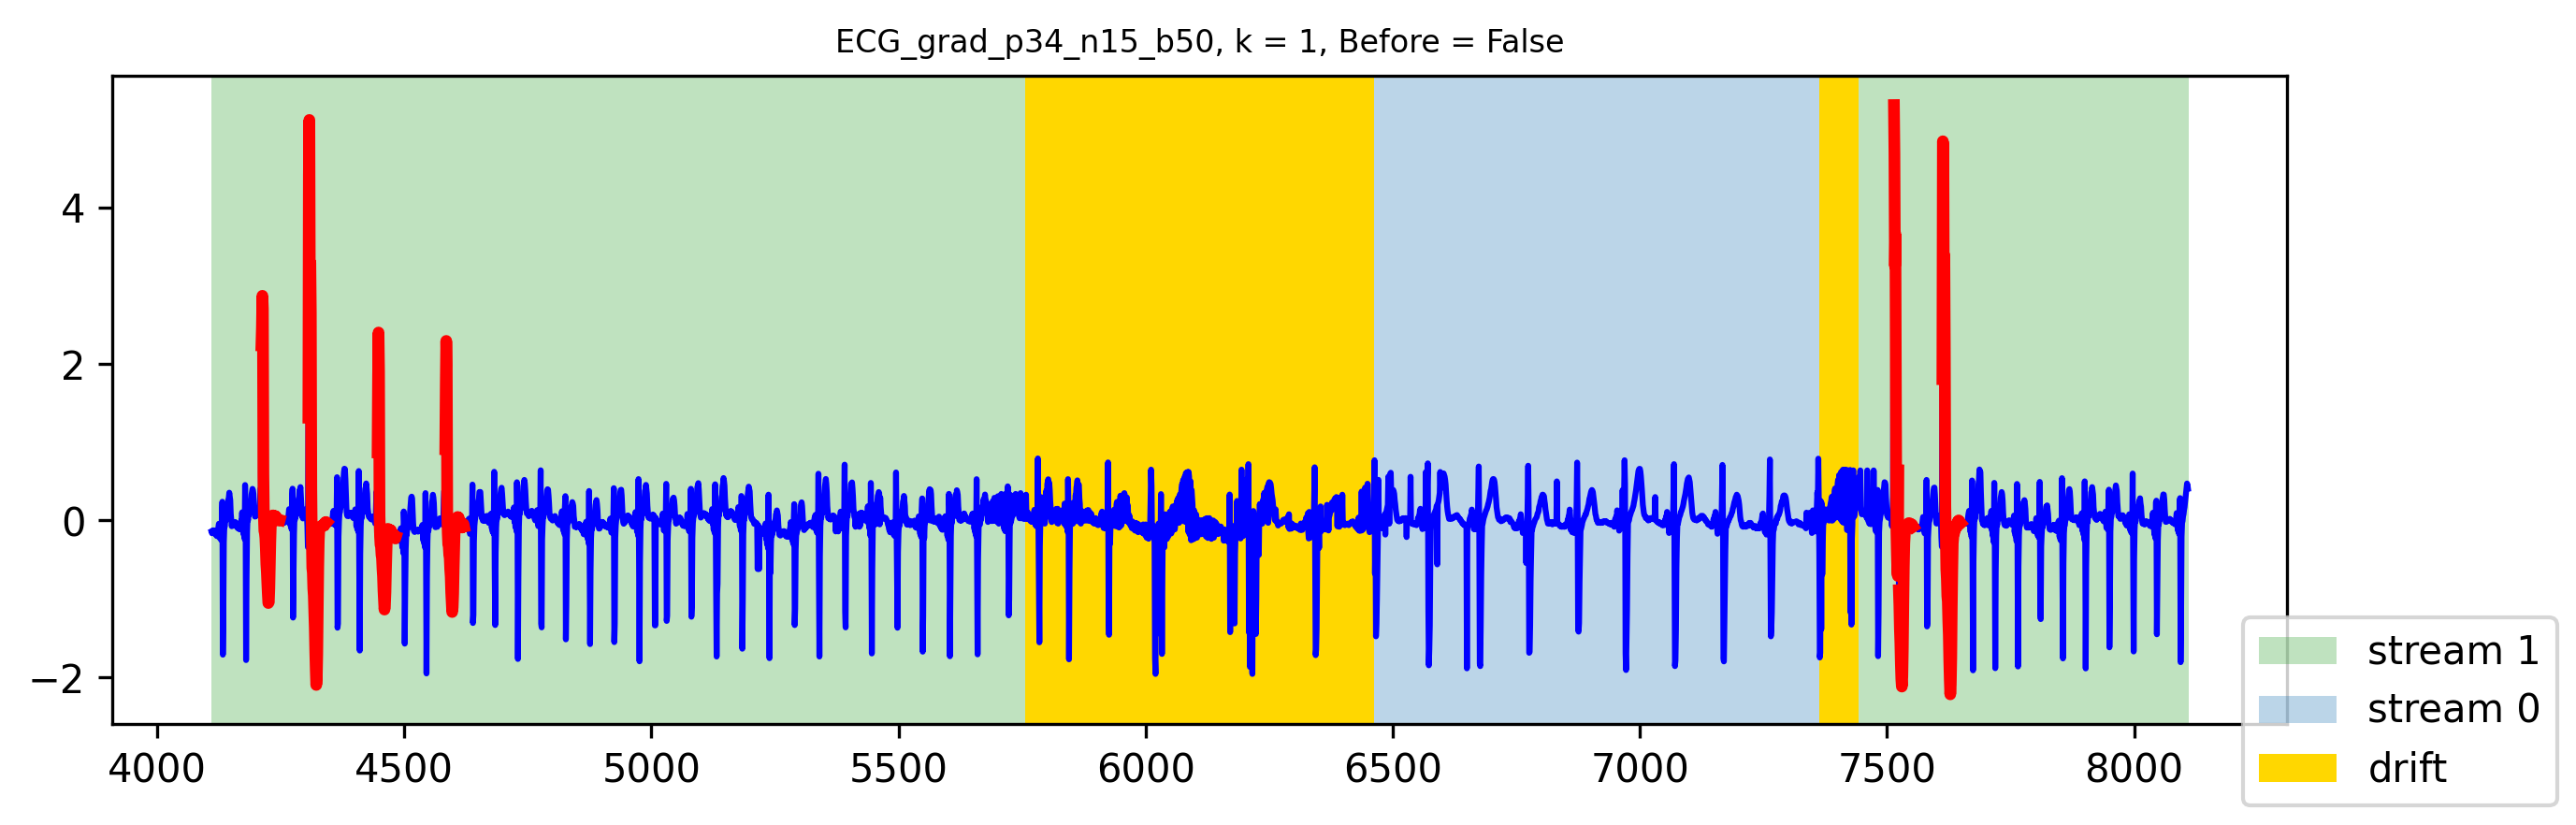

In [10]:
# Plot the 1st drift segment of drift stream
ds.plot_drift_k(k=1, w=2000)

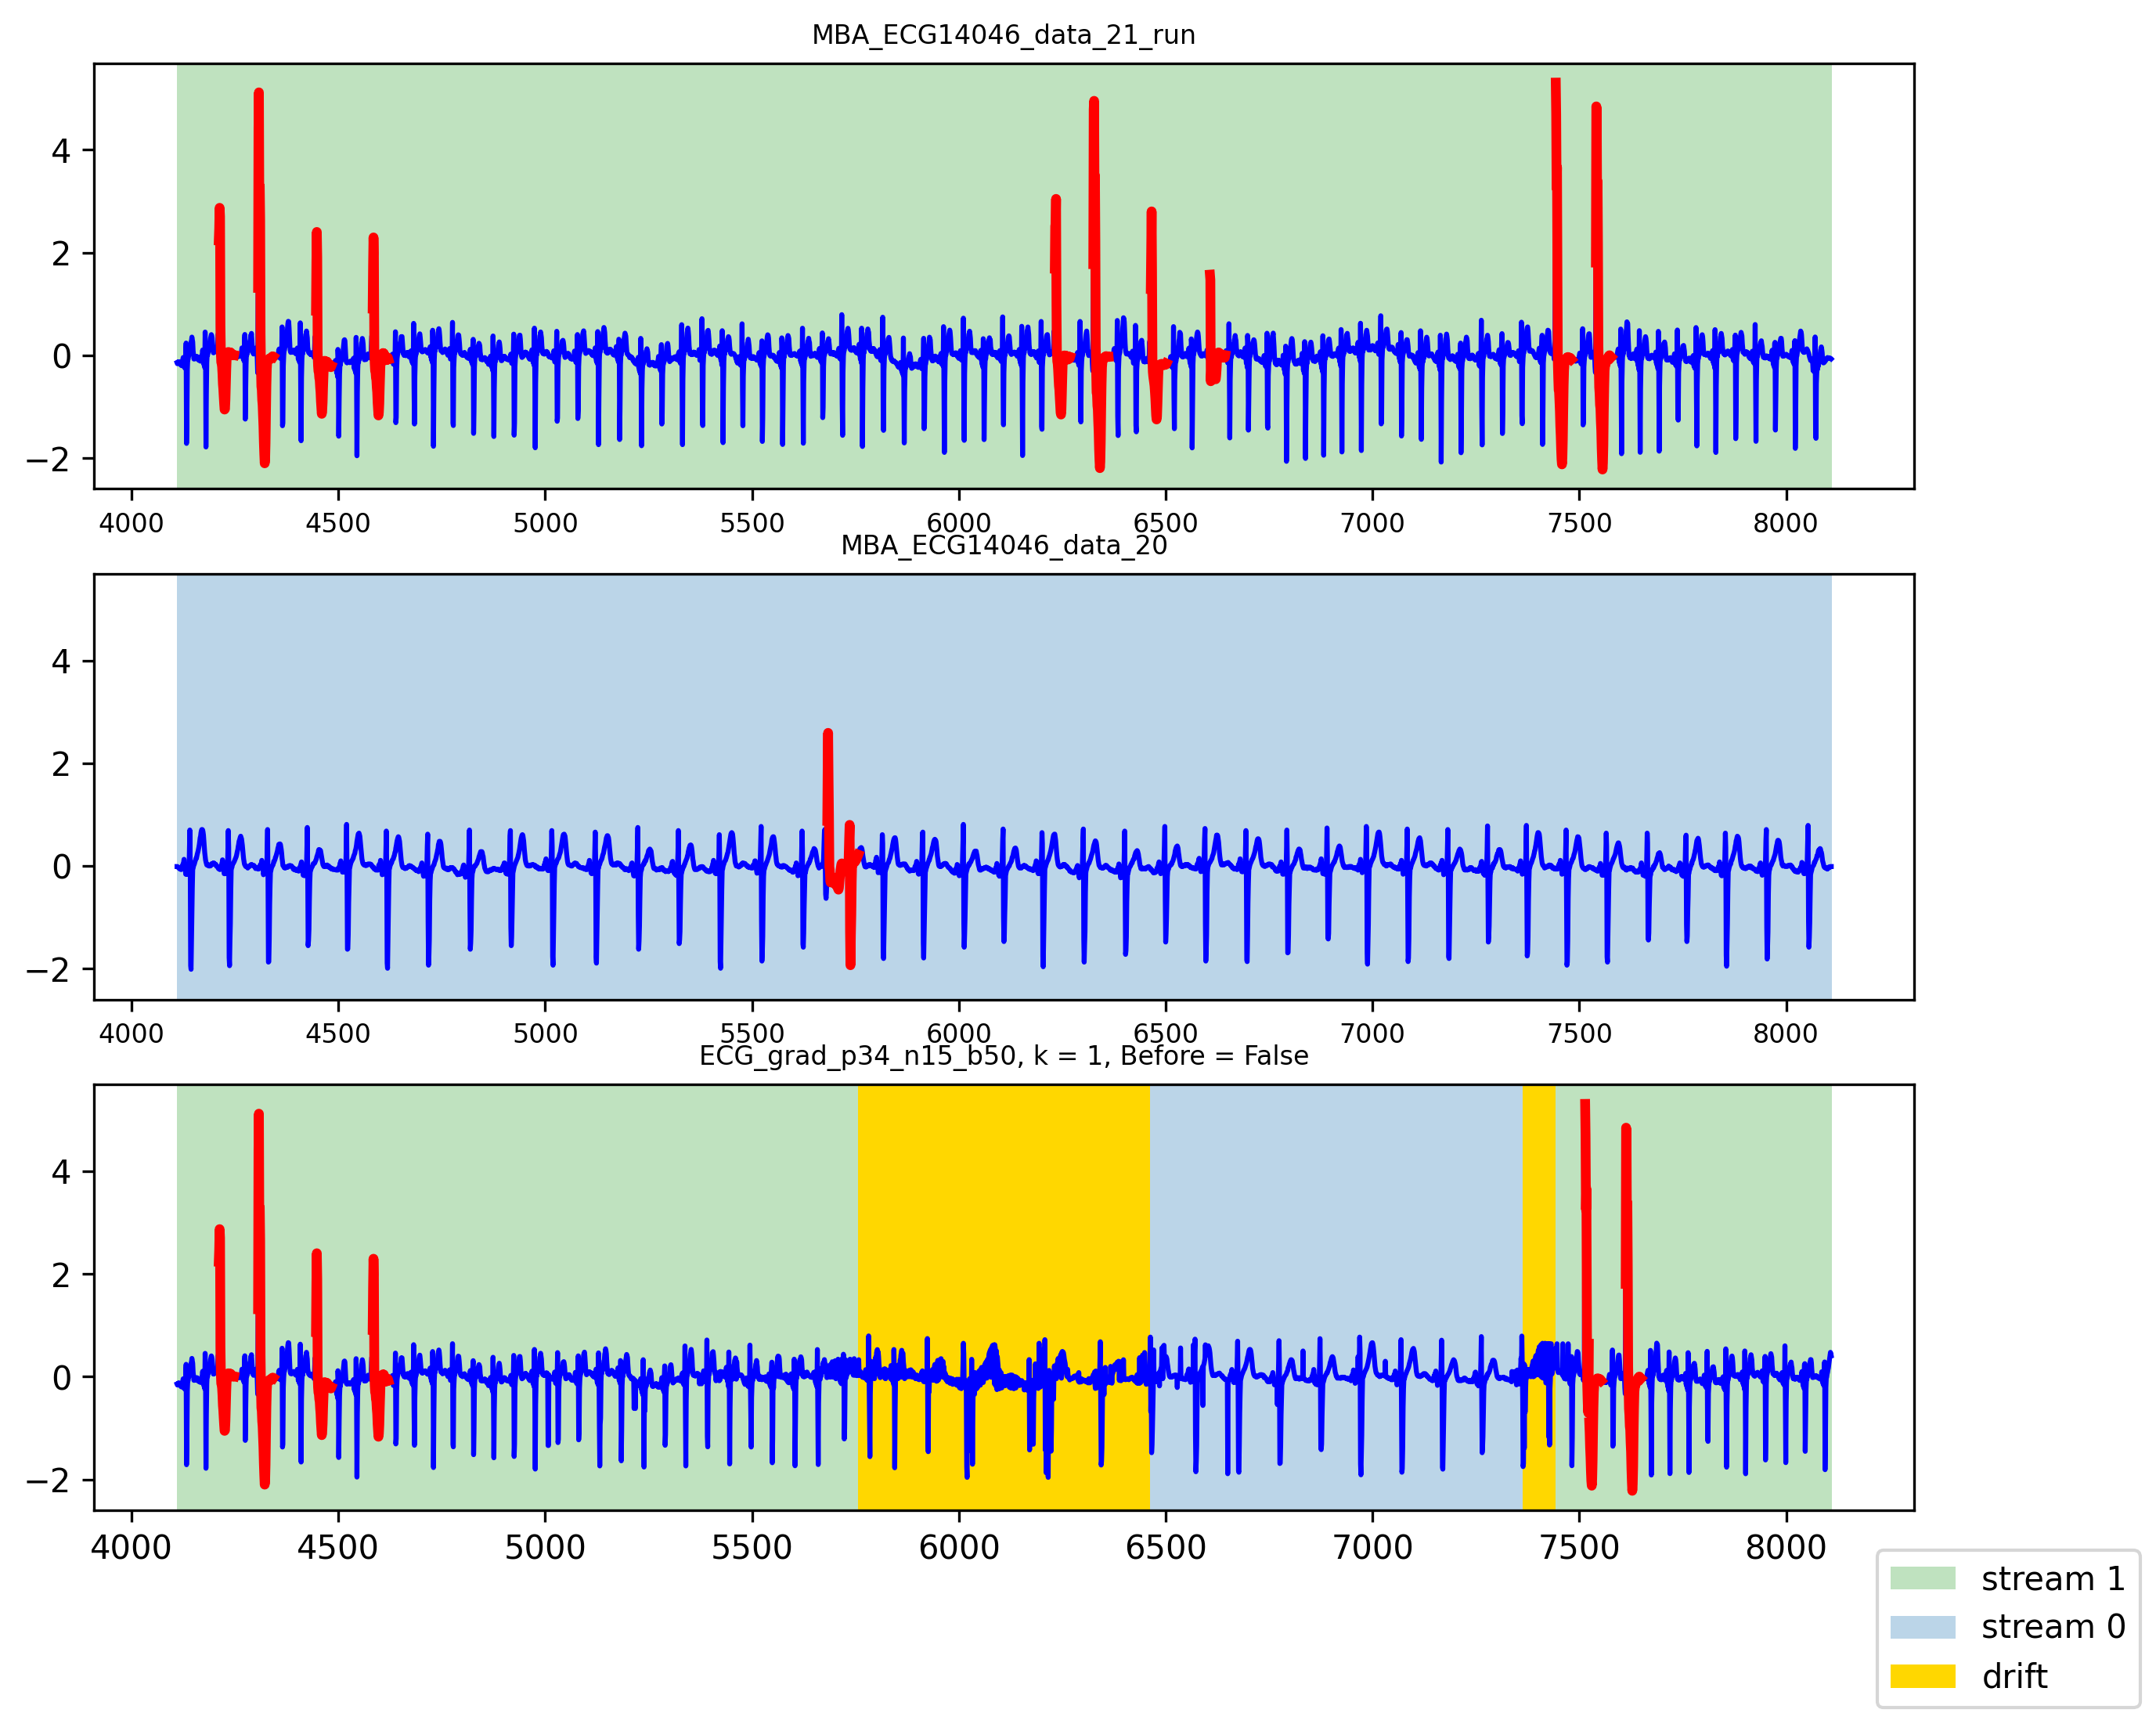

In [11]:
# Plot the 1st drift segment of drift stream along with the original source streams
ds.plot_drift_k_with_source(k=1, w=2000)

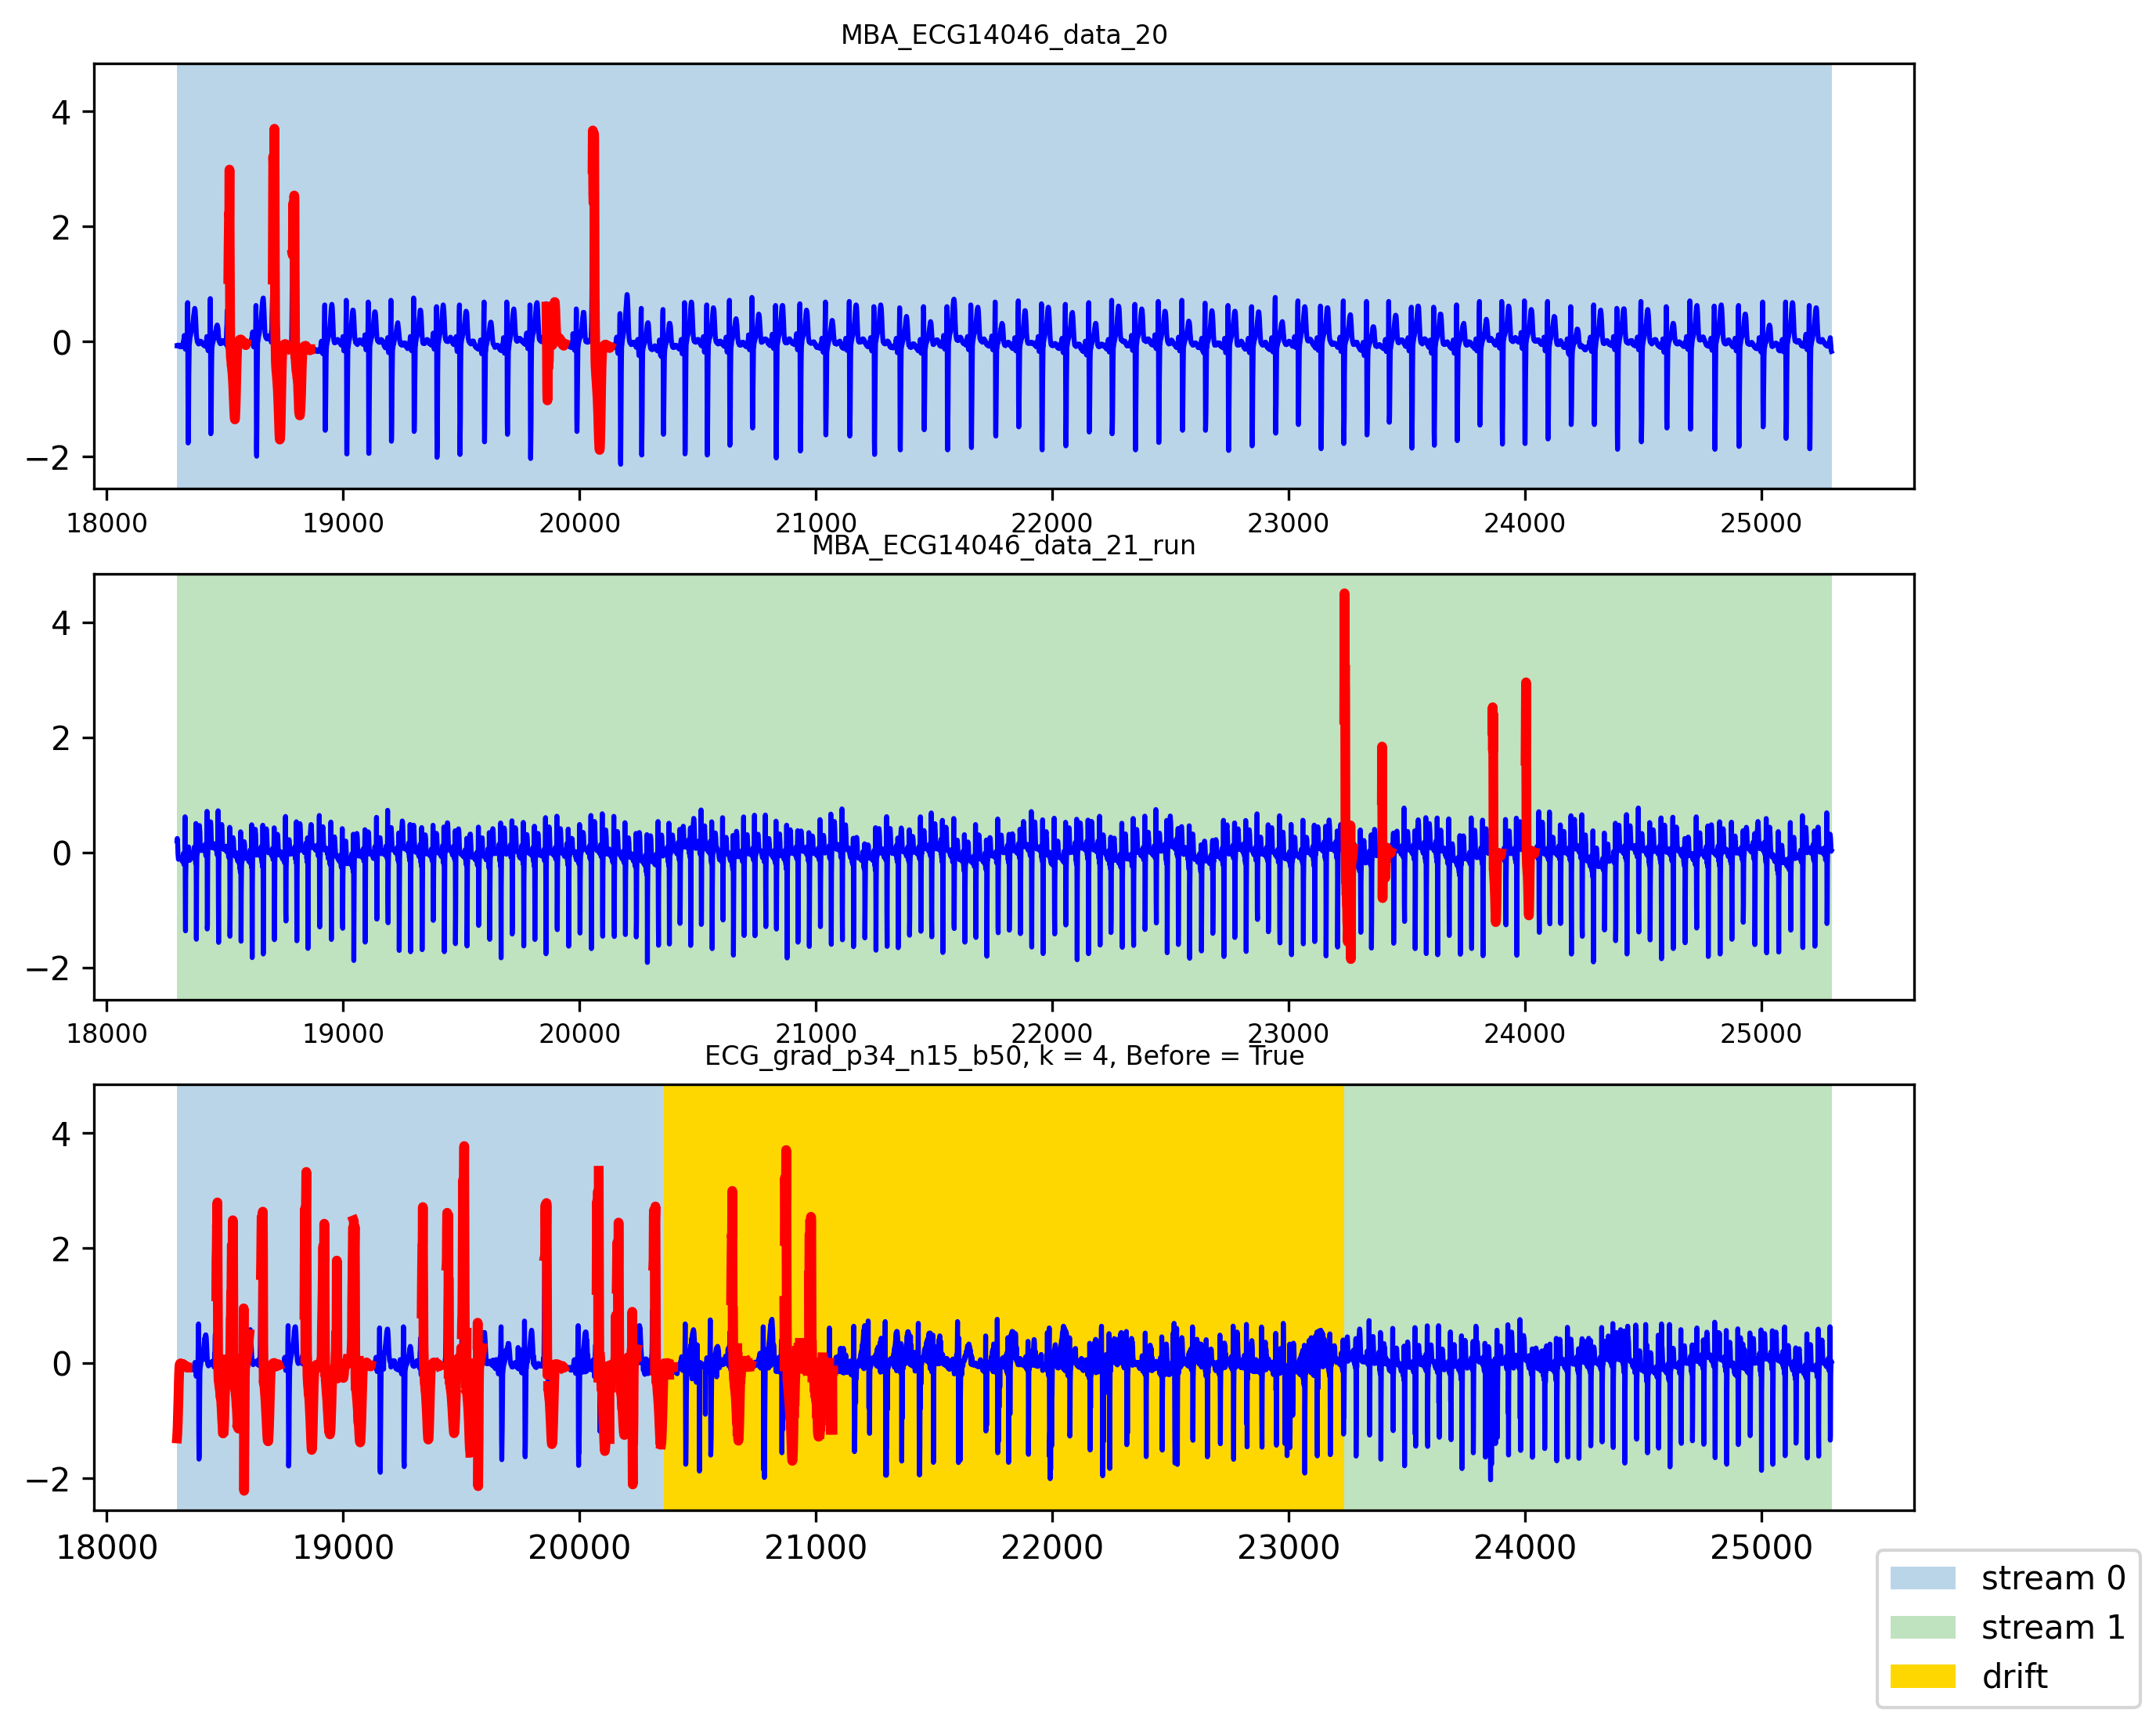

In [12]:
# Plot the 4th drift segment of drift stream along with the original source streams
ds.plot_drift_k_with_source(k=4, w=3500)